In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Read the data from CSV
air = pd.read_csv("D:\\data ANALYTICS AND SCIENCE\\international-airline-passengers.csv")
air


,Month,monthly totals in thousands
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


In [17]:
# Remove rows with missing values
air = air.dropna()
air

,Month,monthly totals in thousands
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


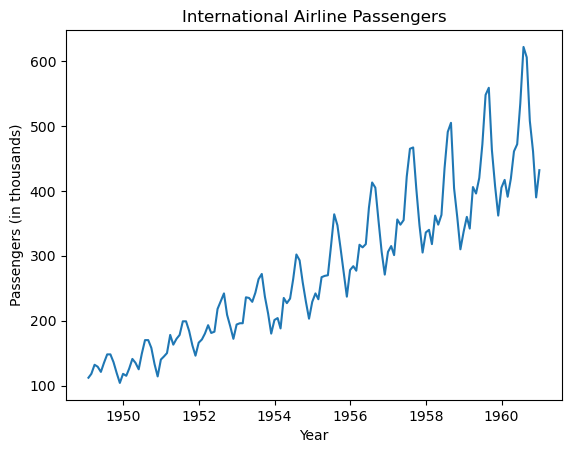

In [21]:
# 1. Plot the time series
passengers = pd.Series(air['monthly totals in thousands'].values,
                       index=pd.date_range(start='1949-01', periods=len(air), freq='M'))

plt.plot(passengers)
plt.xlabel('Year')
plt.ylabel('Passengers (in thousands)')
plt.title('International Airline Passengers')
plt.show()

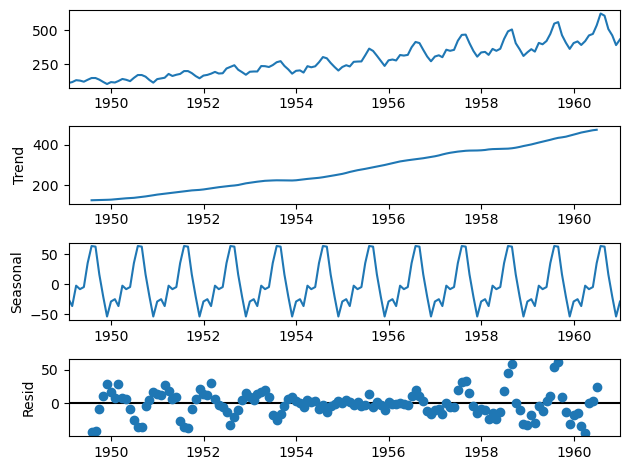

In [22]:
# 2. Decompose the time series
decomposed = seasonal_decompose(passengers, model='additive')
decomposed.plot()
plt.show()


In [23]:
# 3. Test for stationarity
adf_result = adfuller(passengers, autolag='AIC', maxlag=12)
print("ADF Test p-value:", adf_result[1])

ADF Test p-value: 0.9977476645473815


**If null hypothesis is true ,it means it is non stationary.The ADF test p-value is significantly larger than 0.05, indicating that we fail to reject the null hypothesis.Therefore,time series is not stationary.**

In [24]:
# 4. Fit ARIMA model
arima_model = ARIMA(passengers, order=(0, 1, 1))
arima_fit = arima_model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -696.629
Date:                Wed, 28 Jun 2023   AIC                           1397.258
Time:                        18:32:00   BIC                           1403.183
Sample:                    01-31-1949   HQIC                          1399.665
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4027      0.077      5.252      0.000       0.252       0.553
sigma2       996.0870    108.453      9.184      0.000     783.522    1208.652
Ljung-Box (L1) (Q):                   0.07   Jarque-

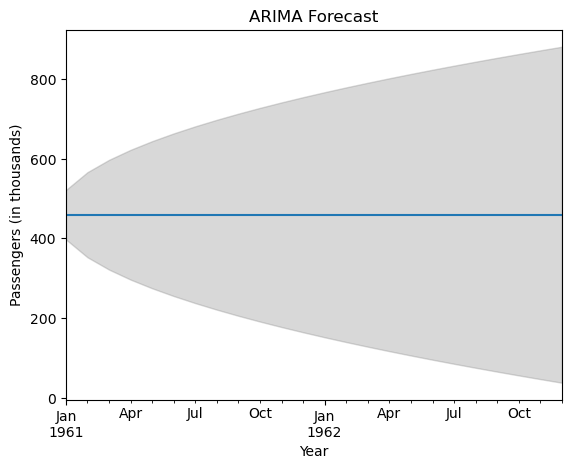

In [30]:
# 5. Plot forecast
forecast = arima_fit.get_forecast(steps=24)
forecast_ci = forecast.conf_int()
forecast.predicted_mean.plot()
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Passengers (in thousands)')
plt.title('ARIMA Forecast')
plt.show()

C:\Users\Sayak23\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


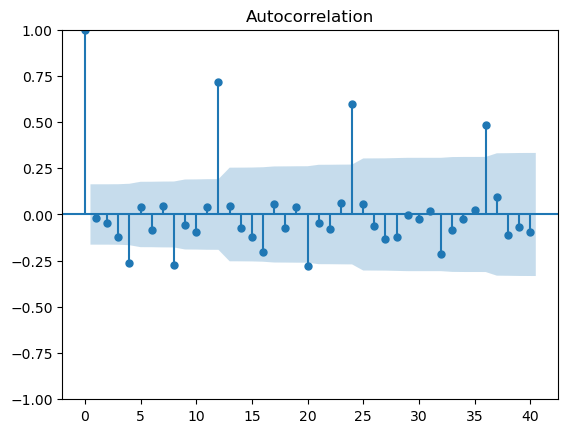

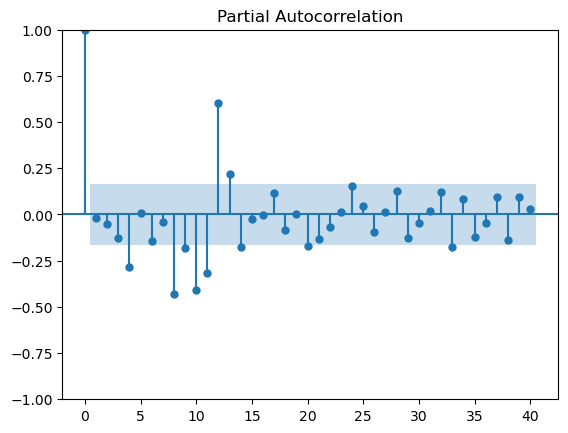

In [27]:
# 6. Check residuals
residuals = arima_fit.resid
plot_acf(residuals, lags=40)
plot_pacf(residuals, lags=40)
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 121.363
Date:                Wed, 28 Jun 2023   AIC                           -238.725
Time:                        18:34:18   BIC                           -232.800
Sample:                    01-31-1949   HQIC                          -236.317
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2768      0.104      2.668      0.008       0.073       0.480
sigma2         0.0107      0.002      6.286      0.000       0.007       0.014
Ljung-Box (L1) (Q):                   0.15   Jarque-

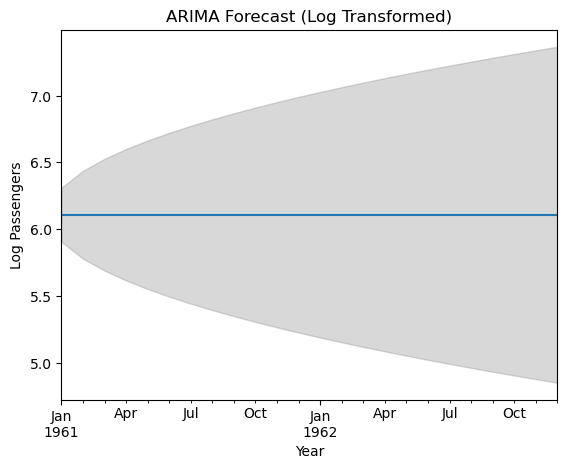

In [28]:
# Additional: Log transformation
log_passengers = np.log(passengers)
arima_model_log = ARIMA(log_passengers, order=(0, 1, 1))
arima_fit_log = arima_model_log.fit()
print(arima_fit_log.summary())

forecast_log = arima_fit_log.get_forecast(steps=24)
forecast_ci_log = forecast_log.conf_int()
forecast_log.predicted_mean.plot()
plt.fill_between(forecast_ci_log.index, forecast_ci_log.iloc[:, 0], forecast_ci_log.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Log Passengers')
plt.title('ARIMA Forecast (Log Transformed)')
plt.show()


**Comapring normal transformation vs log transformation** 

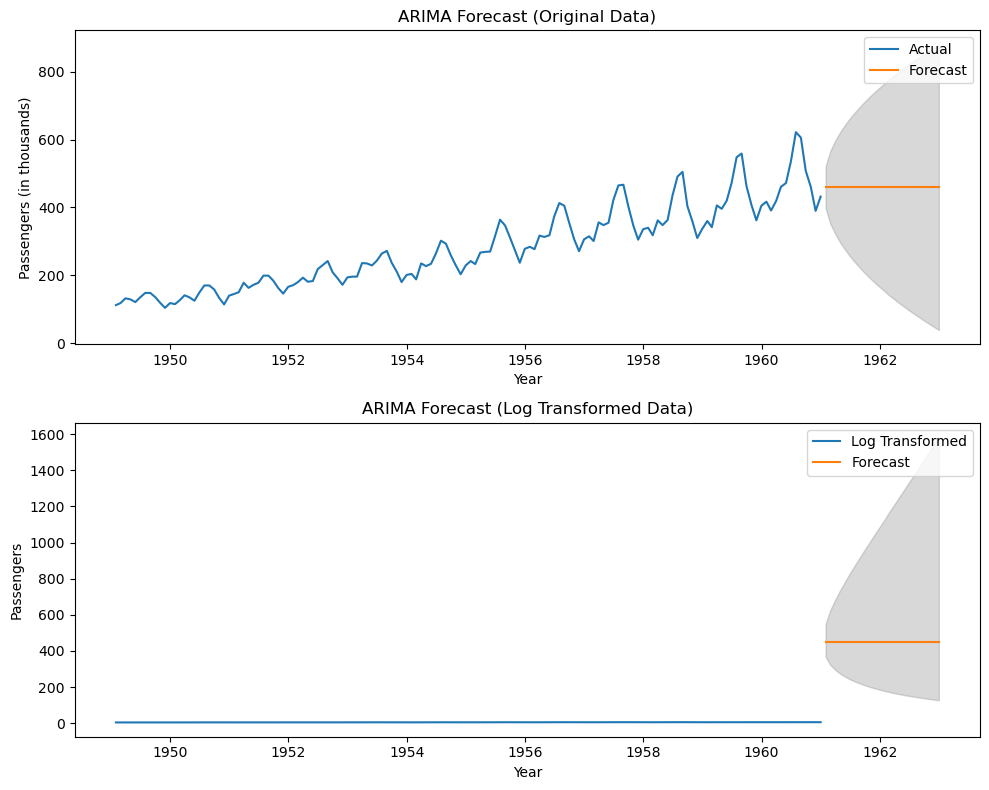

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. Plot the time series
passengers = pd.Series(air['monthly totals in thousands'].values,
                       index=pd.date_range(start='1949-01', periods=len(air), freq='M'))

# Log-transformed data
log_passengers = np.log(passengers)

# Fitting ARIMA models
arima_model = ARIMA(passengers, order=(0, 1, 1))
arima_fit = arima_model.fit()

arima_model_log = ARIMA(log_passengers, order=(0, 1, 1))
arima_fit_log = arima_model_log.fit()

# Forecasting
forecast = arima_fit.get_forecast(steps=24)
forecast_ci = forecast.conf_int()

forecast_log = arima_fit_log.get_forecast(steps=24)
forecast_ci_log = forecast_log.conf_int()

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Original data plot
ax1.plot(passengers.index, passengers, label='Actual')
ax1.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
ax1.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
ax1.set_xlabel('Year')
ax1.set_ylabel('Passengers (in thousands)')
ax1.set_title('ARIMA Forecast (Original Data)')
ax1.legend()

# Log-transformed data plot
ax2.plot(log_passengers.index, log_passengers, label='Log Transformed')
ax2.plot(forecast_log.predicted_mean.index, np.exp(forecast_log.predicted_mean), label='Forecast')
ax2.fill_between(forecast_ci_log.index, np.exp(forecast_ci_log.iloc[:, 0]), np.exp(forecast_ci_log.iloc[:, 1]), color='gray', alpha=0.3)
ax2.set_xlabel('Year')
ax2.set_ylabel('Passengers')
ax2.set_title('ARIMA Forecast (Log Transformed Data)')
ax2.legend()

plt.tight_layout()
plt.show()


**The top subplot represents the forecast using the original data, and the bottom subplot represents the forecast using the log-transformed data. Both subplots show the actual data, forecasted values, and confidence intervals. The y-axis in the top subplot represents the number of passengers (in thousands), while the y-axis in the bottom subplot represents the back-transformed passengers.**

Log transforming the data can help stabilize the variance and address cases where the variability of the time series increases with the level of the series.